In [207]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns



In [208]:

test_data=pd.read_csv("C:/Users/chizu/OneDrive/Desktop/Bootcamp/week 8/customer segmentation - unsupervised learning/Test.csv")


In [209]:
test_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [211]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [212]:
#Checking for missing values.
test_data.isna().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [213]:
#Replacing every nan value with just 0 for now.
test_data.fillna(0, inplace=True)

In [214]:
test_data


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,0,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,0.0,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,0.0,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [215]:
test_data.drop(['ID', 'Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1'], axis=1, inplace=True)

In [216]:
test_data.describe()

,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2627.000000
mean,43.649791,2.291207,2.703845
std,16.967015,3.258607,1.622809
min,18.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000
50%,41.000000,1.000000,2.000000
75%,53.000000,3.000000,4.000000
max,89.000000,14.000000,9.000000


In [217]:
test_data.head()

,Age,Work_Experience,Family_Size
0,36,0.0,1.0
1,37,8.0,4.0
2,69,0.0,1.0
3,59,11.0,2.0
4,19,0.0,4.0


In [218]:
#Extracting columns age and spending score and saving into a new data frame
age_we = test_data.iloc[:, [1,2]].values


In [219]:
age_we

array([[0., 1.],
       [8., 4.],
       [0., 1.],
       ...,
       [0., 2.],
       [1., 5.],
       [9., 3.]])

In [220]:
test_data.isna().sum()

Age                0
Work_Experience    0
Family_Size        0
dtype: int64

In [202]:
#Using the elbow method to decide on how many clusters would be optimal
wcss = [] 
for i in range(1,11):
    kmeans = KMeans(n_clusters =i, n_init=15, random_state =0)
    kmeans.fit(age_we)
    wcss.append(kmeans.inertia_)

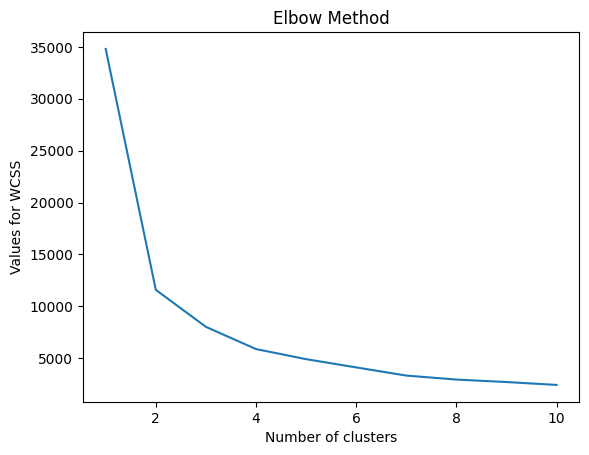

In [221]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Values for WCSS')
plt.show()

#Suggests that the optimal number of clusters is 3.

In [225]:
#Applying the optimal number of clusters to a k-means model.
#Gain insights into clusters.

kmodel = KMeans(n_clusters=4, init='k-means++', random_state=0)




c:\Users\chizu\OneDrive\Documents\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


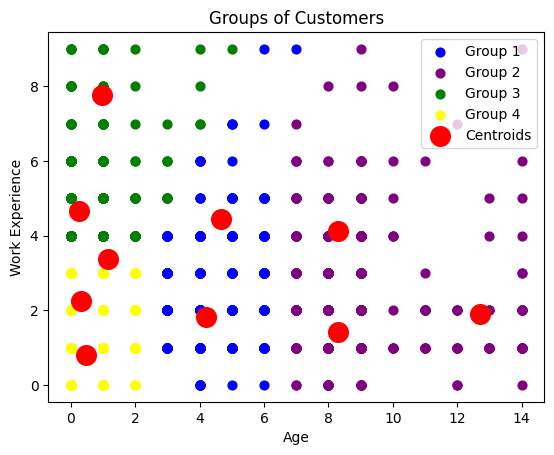

In [226]:


#Centroid points
pred_kmeans = kmodel.fit_predict(age_we)

##Plotting the clusters
plt.scatter(age_we[pred_kmeans ==0,0], age_we[pred_kmeans==0,1], s=40, c='blue', label = 'Group 1')
plt.scatter(age_we[pred_kmeans ==1,0], age_we[pred_kmeans==1,1], s=40, c='purple', label = 'Group 2')
plt.scatter(age_we[pred_kmeans ==2,0], age_we[pred_kmeans==2,1], s=40, c='green', label = 'Group 3')
plt.scatter(age_we[pred_kmeans ==3,0], age_we[pred_kmeans==3,1], s=40, c='yellow', label = 'Group 4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s =200, c = 'red', label = 'Centroids')
plt.title('Groups of Customers')
plt.xlabel('Age')
plt.ylabel('Work Experience')
plt.legend()
plt.show()


